<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Tensorflow-Developer-ZTM/blob/main/%5BPractice_Project%5D_02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification Practice Project

To practice multiclass classification we are going to build neural network to classify different types of clothing.  
  
### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


## Imports

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [2]:
# The fashion mnist is already divided into test and training data.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_to_label = { 0 : 'T-shirt/top',
                   1 : 'Trouser',
                   2 : 'Pullover',
                   3 : 'Dress',
                   4 : 'Coat',
                   5 : 'Sandal',
                   6 : 'Shirt',
                   7 : 'Sneaker',
                   8 : 'Bag',
                   9 : 'Ankle boot'
                  }
print("Class Labels Dictionary: ", class_to_label)
print("Total number of classes: ", len(class_to_label))

Class Labels Dictionary:  {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
Total number of classes:  10


## Visualize loaded dataset

The 10th training example:
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123

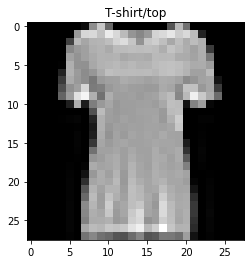

In [4]:
# Visualize a training sample
i = 10
print(f"The {i}th training example:")
print(X_train[i])
print(f"The {i} th training label is: {y_train[i]}: {class_to_label[y_train[i]]}")

plt.imshow(X_train[i], cmap = 'gray');
plt.title(class_to_label[y_train[i]]);

In [5]:
# Check the shapes of train and test data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Function to visualize multiple random images from the dataset

def visualize_data(images, labels, to_plot = 12, class_to_label = class_to_label):
  """
  Visualize data by plotting a given number of random images.
  """
  ax = plt.figure(figsize = (12, to_plot/4 *3))
  for i in range(to_plot):
    random_choice = np.random.choice(len(labels))
    ax = plt.subplot(to_plot/4, 4, i+1)
    ax = plt.imshow(images[random_choice], cmap = 'gray')
    ax = plt.title(class_to_label[labels[random_choice]], fontdict={'fontsize': 15, 'color': 'green'})
    ax = plt.axis(False)


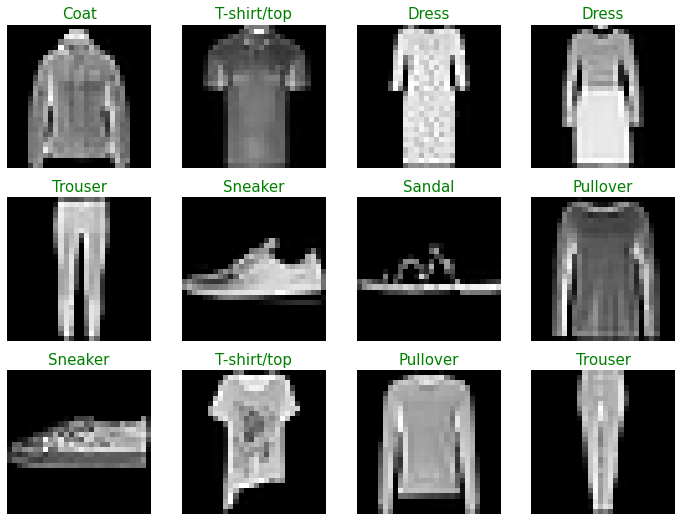

In [7]:
visualize_data(X_train, y_train)

## Build a model
Since this is a multiclass classification problem, we'll need to make a few changes to our architecture.

* The **input shape** will have to deal with `28x28` tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be `10` because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function. 
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).[Important]
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.


In [21]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28)),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(10, activation = 'softmax')
])


model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

non_norm_history_1 = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [9]:
# What does flatten layers do?
temp_model = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28))])
temp_model.output_shape

(None, 784)

In [10]:
oh_y_train = tf.one_hot(y_train, depth = 10)
oh_y_test = tf.one_hot(y_test, depth = 10)

In [11]:
oh_y_test.shape

TensorShape([10000, 10])

In [12]:
oh_y_test[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [22]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28)),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(10, activation = 'softmax')
])


model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

non_norm_history_2 = model_2.fit(X_train, oh_y_train, epochs = 10, validation_data = (X_test, oh_y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Scaling/Normalizing the data

Divide pixels by 255 to bring between 0 and 1.

In [18]:
tf.reduce_min(X_train), tf.reduce_max(X_train)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [19]:
norm_X_train = X_train / 255.
norm_X_test = X_test/ 255.

In [20]:
tf.reduce_min(norm_X_train),tf.reduce_max(norm_X_train)

(<tf.Tensor: shape=(), dtype=float64, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.0>)

In [34]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape = (28,28)),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(4, activation = 'relu'),
                      tf.keras.layers.Dense(10, activation = 'softmax')
])


model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

norm_history_3 = model_3.fit(norm_X_train, y_train, epochs = 10, validation_data=(norm_X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

## Visualizing norm and non norm history

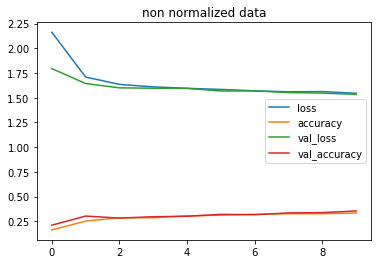

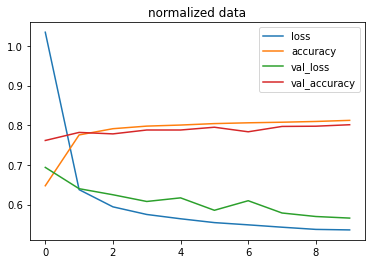

In [32]:
pd.DataFrame(non_norm_history_1.history).plot(title = 'non normalized data')
pd.DataFrame(norm_history_3.history).plot(title = 'normalized data')

## Finding the ideal learning rate

In [38]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')
])


model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['acc'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_4.fit(norm_X_train, y_train, 
                        epochs = 40, 
                        validation_data = (norm_X_test, y_test),
                        callbacks = [lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - acc: 0.5004 - val_loss: 0.6937 - val_acc: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - acc: 0.7707 - val_loss: 0.6400 - val_acc: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - acc: 0.7901 - val_loss: 0.6278 - val_acc: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - acc: 0.7978 - val_loss: 0.6122 - val_acc: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - acc: 0.7995 - val_loss: 0.6061 - val_acc: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - acc: 0.8003 - val_loss: 0.5917 - val_acc: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - acc: 0.8043 - val_loss: 0.5898 - val_acc: 0.7896
Epoch 8/40
1875/1875 [==============================] - 3s 2ms

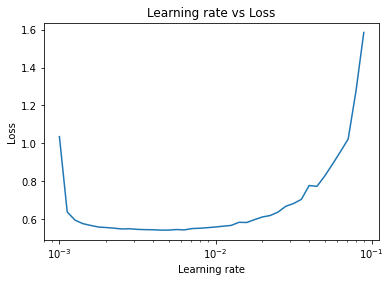

In [41]:
# Plot learnign rate decay curve [Important]

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss');

This shows that our ideal learning rate is 0.001 which is the same as the default lr we are currently using.